<a href="https://colab.research.google.com/github/VoprosNaOtvet/Lab8-Maslyaeva/blob/main/%D0%9B%D0%A08_%D0%9C%D0%B0%D1%81%D0%BB%D1%8F%D0%B5%D0%B2%D0%B0_%D0%95%D0%A1_%D0%91%D0%9C%D0%A21_11%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Лабораторная работа №8**
линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

### 1. Регрессия
Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score, roc_curve, accuracy_score, f1_score

In [ ]:
diabetes = load_diabetes()
breast_cancer = load_breast_cancer()

X_diabetes, y_diabetes = diabetes.data, diabetes.target
X_bc, y_bc = breast_cancer.data, breast_cancer.target

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)
X_bc_train, X_bc_test, y_bc_train, y_bc_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

In [ ]:
# Линейная регрессия
linear_reg = LinearRegression()
linear_reg.fit(X_diabetes_train, y_diabetes_train)
y_diabetes_pred_linear = linear_reg.predict(X_diabetes_test)

In [ ]:
# Полиномиальная регрессия
poly_features = PolynomialFeatures(degree=2)
X_diabetes_train_poly = poly_features.fit_transform(X_diabetes_train)
X_diabetes_test_poly = poly_features.transform(X_diabetes_test)

poly_reg = LinearRegression()
poly_reg.fit(X_diabetes_train_poly, y_diabetes_train)
y_diabetes_pred_poly = poly_reg.predict(X_diabetes_test_poly)

In [ ]:
# Регуляризация: Ridge, Lasso, ElasticNet
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_diabetes_train, y_diabetes_train)
y_diabetes_pred_ridge = ridge_reg.predict(X_diabetes_test)

lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_diabetes_train, y_diabetes_train)
y_diabetes_pred_lasso = lasso_reg.predict(X_diabetes_test)

elastic_net_reg = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_reg.fit(X_diabetes_train, y_diabetes_train)
y_diabetes_pred_elastic_net = elastic_net_reg.predict(X_diabetes_test)

In [ ]:
def metrics(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} - R2: {r2:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

Linear - R2: 0.4526, MSE: 2900.1936, MAE: 42.7941
Polynomial - R2: 0.4156, MSE: 3096.0283, MAE: 43.5817


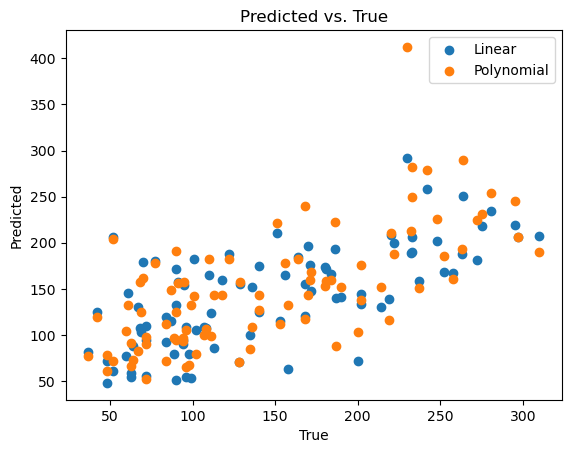

In [ ]:
# Вывод метрик для регрессии
metrics(y_diabetes_test, y_diabetes_pred_linear, "Linear")
metrics(y_diabetes_test, y_diabetes_pred_poly, "Polynomial")

# Построение scatterplot predicted vs. true
plt.scatter(y_diabetes_test, y_diabetes_pred_linear, label="Linear")
plt.scatter(y_diabetes_test, y_diabetes_pred_poly, label="Polynomial")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("Predicted vs. True")
plt.legend()
plt.show()

Линейная регрессия показала немного лучшие результаты, чем полиномиальная, как по коэффициенту детерминации (R2), так и по ошибкам (MSE и MAE). Это может указывать на то, что данные имеют линейную зависимость, и добавление полиномиальных признаков не улучшило качество модели.

На графике видно, что обе модели (линейная и полиномиальная) имеют значительный разброс предсказаний относительно истинных значений. Это подтверждает, что обе модели не идеально подходят для данных, но линейная регрессия немного лучше справляется с задачей.

### 2. Классификация
Найти оптимальное значение параметра регуляризации с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.

In [ ]:
# Поиск оптимального значения параметра регуляризации C с помощью LogisticRegressionCV
log_reg_cv = LogisticRegressionCV(Cs=10, cv=5, scoring='roc_auc', solver='liblinear', max_iter=1000)
log_reg_cv.fit(X_bc_train, y_bc_train)

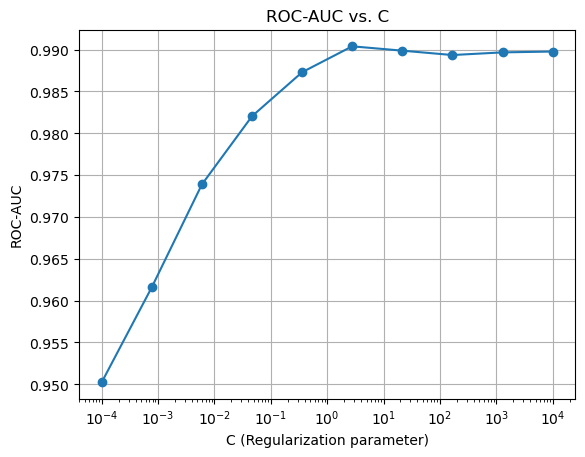

In [ ]:
# Построение графика зависимости ROC-AUC от параметра C
C_values = log_reg_cv.Cs_
mean_scores = log_reg_cv.scores_[1].mean(axis=0)

plt.plot(C_values, mean_scores, marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC vs. C')
plt.grid(True)
plt.show()

При малых значениях C (меньше 10^{-2}) ROC-AUC ниже, чем при больших значениях C. Это связано с тем, что при малых C модель сильнее регуляризована, что может приводить к недообучению. При больших C регуляризация слабее, и модель лучше подстраивается под данные.

ROC-AUC достигает высоких значений при C от 10^{-1} до 10^4, следовательно оптимальное значение C находится в этом диапазоне.
Для данной задачи рекомендуется выбрать значение C = 1, так как оно обеспечивает высокое качество модели (ROC-AUC ≈ 0.989) и баланс между регуляризацией и подгонкой модели.

Значение ROC-AUC близко к 1 (максимальное значение) для большинства значений C, что указывает на высокое качество модели логистической регрессии. Это означает, что модель хорошо разделяет классы и имеет высокую предсказательную способность.

### 3. Выбрать порог классификации для LogisticRegression на основе метрики

In [ ]:
# Обучение модели логистической регрессии
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_bc_train, y_bc_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
# Получение вероятностей принадлежности к классу 1
y_bc_pred_proba = log_reg.predict_proba(X_bc_test)[:, 1]

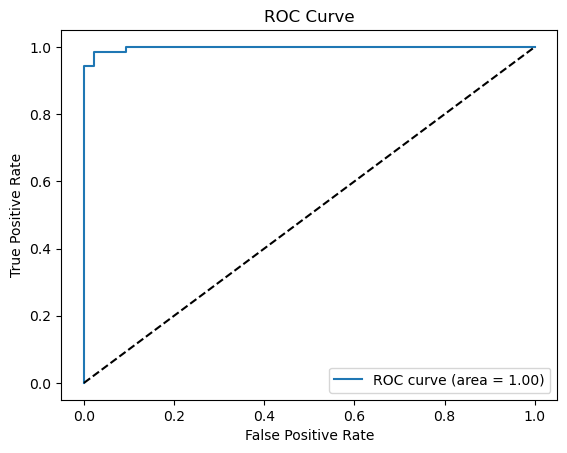

In [ ]:
# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_bc_test, y_bc_pred_proba)
roc_auc = roc_auc_score(y_bc_test, y_bc_pred_proba)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

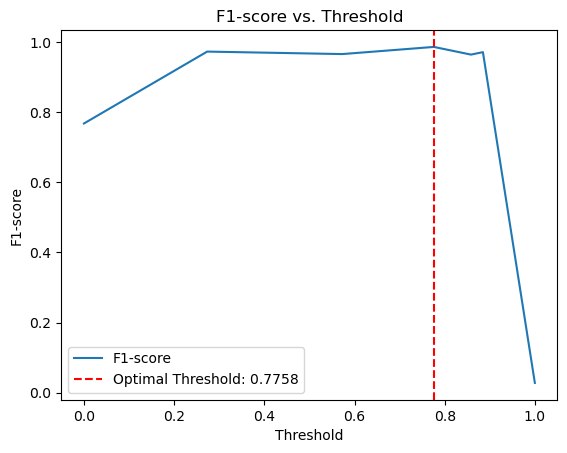

Оптимальный порог: 0.7758
F1-score: 0.9859


In [ ]:
# Вычисление f1-score для каждого порога
f1_scores = [f1_score(y_bc_test, (y_bc_pred_proba >= threshold).astype(int)) for threshold in thresholds]

plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')

# Нахождение оптимального порога по F1-score
optimal_threshold_f1 = thresholds[np.argmax(f1_scores)]

plt.axvline(x=optimal_threshold_f1, color='red', linestyle='--', label=f'Optimal Threshold: {optimal_threshold_f1:.4f}')
plt.legend()
plt.show()

# Применение оптимального порога
y_bc_pred_optimal_f1 = (y_bc_pred_proba >= optimal_threshold_f1).astype(int)
print(f"Оптимальный порог: {optimal_threshold_f1:.4f}")
print(f"F1-score: {f1_score(y_bc_test, y_bc_pred_optimal_f1):.4f}")

Оптимальный порог, при котором F1-score достигает максимального значения, равен 0.7758. Это означает, что для данного датасета и модели логистической регрессии классификация должна выполняться следующим образом: если вероятность принадлежности к классу 1 превышает 0.7758, объект классифицируется как класс 1, иначе — как класс 0.

Значение F1-score при оптимальном пороге составляет 0.9859, что указывает на очень высокое качество модели. F1-score близок к 1, что свидетельствует о хорошем балансе между точностью (Precision) и полнотой (Recall).

## Общий вывод для лабораторной работы:

- Были применены линейная и полиномиальная регрессии к датасету `load_diabetes`. Линейная регрессия показала немного лучшие результаты (R2: 0.4526, MSE: 2900.1936, MAE: 42.7941) по сравнению с полиномиальной (R2: 0.4156, MSE: 3096.0283, MAE: 43.5817). Это указывает на то, что данные имеют линейную зависимость, и добавление полиномиальных признаков не улучшило качество модели.
- Были рассмотрены методы регуляризации (Ridge, Lasso, ElasticNet), которые помогают улучшить обобщающую способность модели, особенно на зашумленных данных.
- Для задачи классификации на датасете `load_breast_cancer` был найден оптимальный параметр регуляризации C с помощью `LogisticRegressionCV`. Оптимальное значение C = 1 обеспечивает высокое качество модели (ROC-AUC ≈ 0.989).
- Также был выбран оптимальный порог классификации (0.7758) на основе максимизации F1-score, который составил 0.9859. Это свидетельствует о высокой точности и полноте модели.